In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
cols = ['Test_A','Test_B','Accepted']
df = pd.read_csv('datasets/admission.data',names=cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test_A    100 non-null    float64
 1   Test_B    100 non-null    float64
 2   Accepted  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25   ,random_state=0)

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [7]:
score = model.score(X_train, y_train)
print("Training score: {:.3f}".format(score))
score = model.score(X_test, y_test)
print("Testing score: {:.3f}".format(score))

Training score: 0.907
Testing score: 0.840


In [8]:
y_test_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, y_test_pred)
print(cfm)

[[11  0]
 [ 4 10]]


<AxesSubplot:>

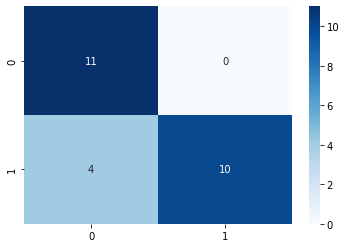

In [9]:
sns.heatmap(cfm, annot=True, cmap='Blues')

<AxesSubplot:>

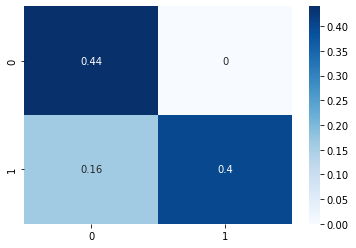

In [10]:
s = np.sum(cfm)
sns.heatmap(cfm/s, annot=True, cmap='Blues')

<AxesSubplot:>

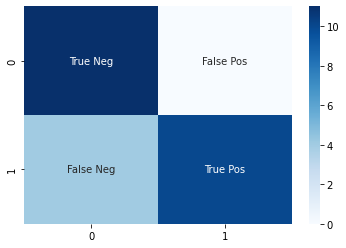

In [11]:
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.array(labels).reshape(2, 2)
sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues')

In [13]:
from sklearn.metrics import classification_report
target_names = ['Rejected', 'Accepted']
cReport = classification_report(y_test, y_test_pred, target_names=target_names)

print(cReport)

              precision    recall  f1-score   support

    Rejected       0.73      1.00      0.85        11
    Accepted       1.00      0.71      0.83        14

    accuracy                           0.84        25
   macro avg       0.87      0.86      0.84        25
weighted avg       0.88      0.84      0.84        25

